In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
import map_dp as map_dp

Example 1: Data generated by Gaussian Mixture Model

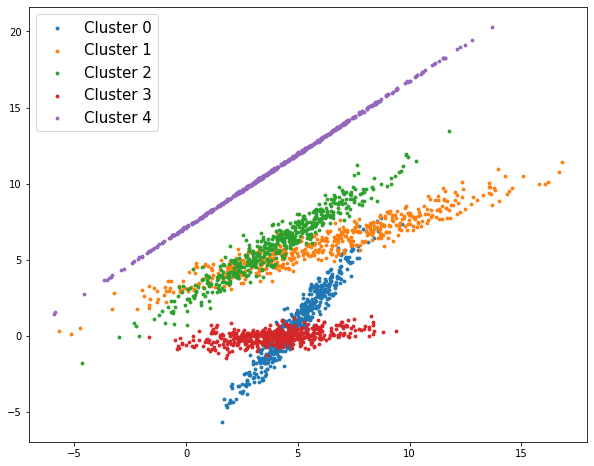

In [21]:
from random import random
from numpy.random import multivariate_normal

def generate_gaussian_data(n_clusters=3):

    # Generate data
    # np.random.seed(1)
    n_samples = 500
    n_features = 2

    for i in range(n_clusters):
        mean = np.random.randint(0, 12, size=n_features)
        cov = np.random.uniform(0, 3, size=(n_features, n_features))
        cov = np.dot(cov, cov.T)

        if i == 0:
            X = multivariate_normal(mean, cov, n_samples)
            X = np.hstack((X, np.ones((n_samples, 1)) * i))
        else:
            X = np.vstack((X, np.hstack((multivariate_normal(mean, cov, n_samples), np.ones((n_samples, 1)) * i))))
    
    X = pd.DataFrame(X, columns=['x1', 'x2', 'cluster'])
    X['cluster'] = X['cluster'].astype(int)
    return X

n_clusters = 5
X = generate_gaussian_data(n_clusters=n_clusters)

# Plot results
xy_plt_size = 8
plt.figure(figsize=(xy_plt_size+2, xy_plt_size))
for j in range(n_clusters):
    plt.scatter(X['x1'][X['cluster'] == j], X['x2'][X['cluster'] == j], s=xy_plt_size, label=f'Cluster {j}')
plt.legend(fontsize=15)
plt.show()

In [22]:
N = X.shape[0]
X = X[['x1', 'x2']].values.T

# Set up Normal-Wishart MAP-DP prior parameters
N0 = 0.5                            # Prior count (concentration parameter)
m0 = X.mean(1)[:, None]             # Normal-Wishart prior mean
a0 = 5                             # Normal-Wishart prior scale
c0 = 10/float(N)                    # Normal-Wishart prior degrees of freedom
B0 = np.diag(1/(0.05*X.var(1)))     # Normal-Wishart prior precision

# Run MAPDP to convergence
mu, z, K, E = map_dp.mapdp_nw(X, N0, m0, a0, c0, B0)

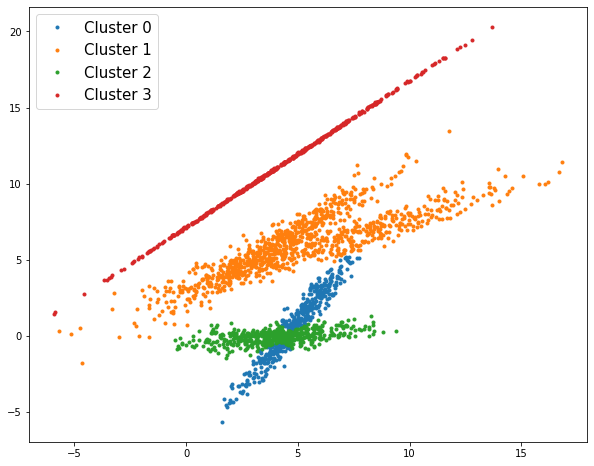

In [23]:
# Plot results
plt.figure(figsize=(xy_plt_size+2, xy_plt_size))

for j in range(K):
    i = (z == j);
    plt.plot(X[0, i], X[1, i], '.')

# plt.gcf().set_size_inches(xy_plt_size, xy_plt_size-2)
plt.legend(['Cluster %d' % k for k in range(K)], fontsize=15)
plt.show()